# ConvexHull

2차원 좌표 평면 위에 존재하는 여러 점들 중 일부를 이용하여 모든 점을 포함하는 볼록 다각형을 그리는 알고리즘

ScatterPlot에 hue를 적용한 경우와 같이 군집별 분포를 표현하는 시각화에서 군집의 범위를 강조하고자 하는 경우 사용된다.

## #01. 준비작업

### [1] 패키지 참조

`scipy` 패키지의 설치가 필요하다.

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel
from scipy.spatial import ConvexHull

### [2] 그래프 초기화

In [4]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

### [3] 데이터 가져오기

각각 50개의 샘플이 포함된 세 가지 붓꽃 종과 각 꽃에 대한 일부 속성을 정리한 데이터 셋

고전 논문인 `The Use of Multiple Measurements in Taxonomic Problems(RA Fisher, 1936)` 에서 사용되었다

| 변수 | 설명 |
|---|---|
| Sepal.Length | 꽃받침 길이(cm) |
| Sepal.Width | 꽃받침 폭(cm) |
| Pepal.Length | 꽃잎 길이(cm) |
| Pepal.Width | 꽃잎 폭(cm) |
| Species | 종 |

In [5]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/iris.xlsx')
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### [4] 데이터 전처리

범주형 데이터에 대한 카테고리 타입 변환

In [6]:
df = origin.astype({'Species':'category'})
df.dtypes

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

## #02. 기본 사용 방법

### [1] iris 데이터의 종류별 분포 확인

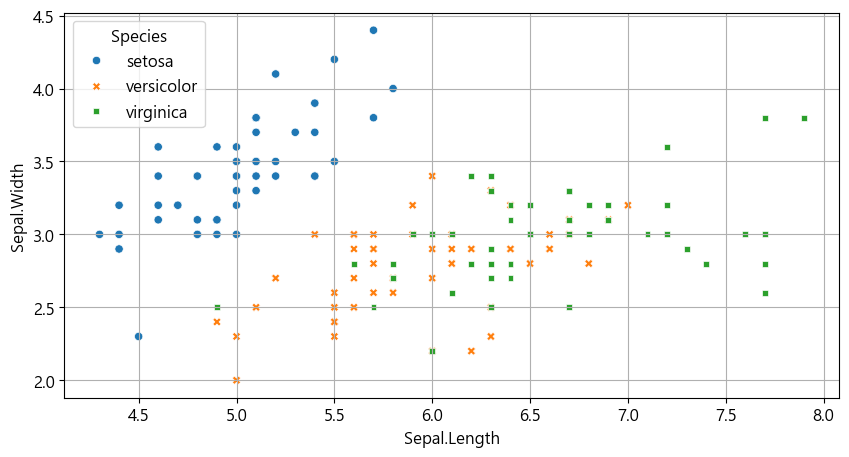

In [11]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df,x='Sepal.Length', y='Sepal.Width', hue='Species', style='Species')
plt.grid()
plt.show()
plt.close()

### [2] 한 가지 종류의 데이터만 분리

In [13]:
setosa_df = df.loc[df['Species'] == 'setosa', ['Sepal.Length', 'Sepal.Width']]
setosa_df

,Sepal.Length,Sepal.Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


### [3] ConvexHull 알고리즘 적용

#### (1) 객체 생성

In [14]:
hull = ConvexHull(setosa_df)
hull

#### (2) 가장 외각의 데이터 포인트 인덱스 추출

In [15]:
hull.vertices

array([13, 41, 36, 18, 14, 15, 32, 22], dtype=int32)

#### (3) 외각선 좌표 얻기

In [16]:
points = np.append(hull.vertices,hull.vertices[0])
points

array([13, 41, 36, 18, 14, 15, 32, 22, 13], dtype=int32)

### [4] 산점도 그래프와 함께 표현하기


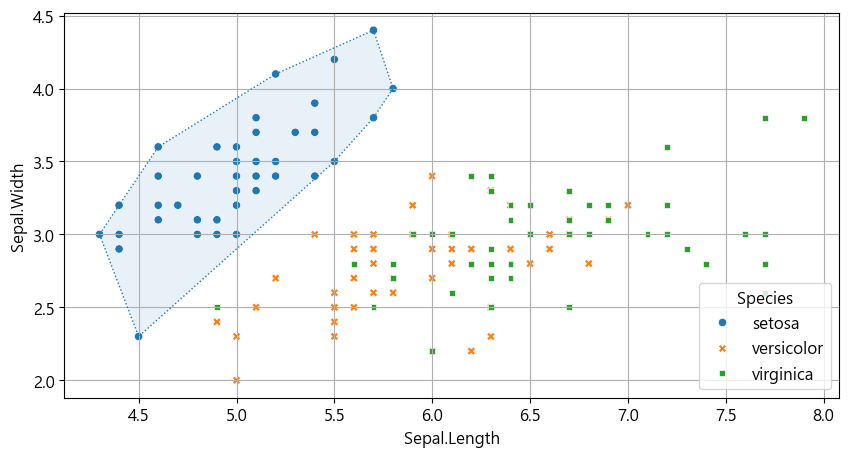

In [17]:
plt.figure(figsize=(10,5))

plt.plot(setosa_df.iloc[points, 0], setosa_df.iloc[points, 1], linewidth=1, linestyle=':')
plt.fill(setosa_df.iloc[points, 0], setosa_df.iloc[points, 1], alpha=0.1)


sb.scatterplot(data=df,x='Sepal.Length', y='Sepal.Width', hue='Species', style='Species')

plt.grid()
plt.show()
plt.close()

## #03. 모든 군집에 일괄 적용

### [1] 데이터의 군집 종류 얻기

In [18]:
classes = df['Species'].unique()
classes

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### [2] 데이터 시각화

군집별로 반복처리 하면서 외각선을 표시한다.

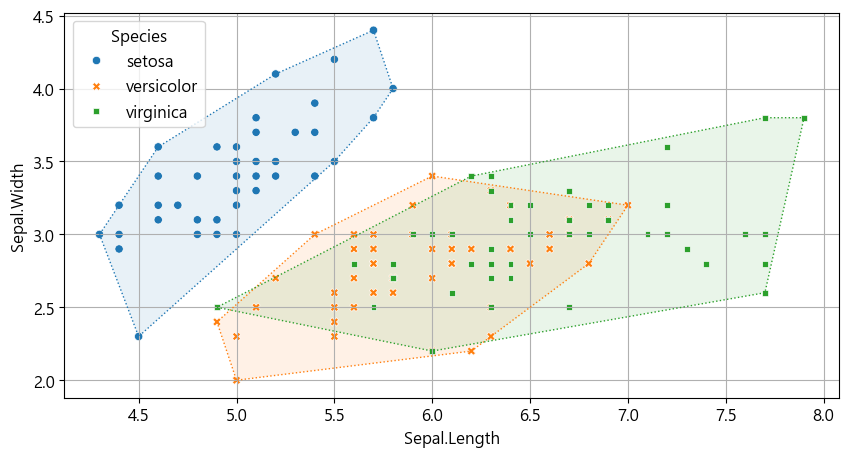

In [20]:
plt.figure(figsize=(10,5))

for i in classes:
    df_i = df.loc[df['Species'] == i, ['Sepal.Length', 'Sepal.Width']]

    hull = ConvexHull(df_i)
    points = np.append(hull.vertices,hull.vertices[0])

    plt.plot(df_i.iloc[points,0], df_i.iloc[points,1], linewidth=1, linestyle=':')
    plt.fill(df_i.iloc[points,0], df_i.iloc[points,1], alpha=0.1)

sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species', style='Species')

plt.grid()
plt.show()
plt.close()